In [ ]:
housing_df['zip'] = housing_df['address'].map(lambda x: x.split(',')[-2][-5:])  ##

## Anat Notebook


## imports

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
from code.features import has_feature
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from random import gauss, seed
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


In [3]:
housing_df = pd.read_csv('data/kc_house_data.csv')

In [4]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [5]:
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [7]:
housing_df[['price']].mean()

price    1.108536e+06
dtype: float64

In [9]:
housing_df[['sewer_system']].value_counts()

sewer_system      
PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
dtype: int64

In [ ]:
housing_df['zip'] = housing_df['address'].map(lambda x: x.split(',')[-2][-5:])


### Importing zip codes from website (note here what was happening)

In [10]:
zip_codes = pd.read_csv('data/King_County_Zip_Codes.csv')

In [11]:
zip_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Zip Codes  120 non-null    int64
dtypes: int64(1)
memory usage: 1.1 KB


Removing zip codes outside of kings county based on CSV (doing this by merge) 

In [12]:
kc_only = housing_df.merge(zip_codes['Zip Codes'].astype(str),left_on='zip',right_on='Zip Codes',how='inner')

In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [15]:
kc_only

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,Zip Codes
0,7399300360,5/24/2022,675000.00000,4,1.00000,1180,7140,1.00000,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46198,-122.19052,98055,98055
1,3340401570,3/2/2022,750000.00000,3,2.00000,1830,7969,1.00000,NO,NO,...,930,240,90,1950,2008,"306 South 15th Street, Renton, Washington 9805...",47.46673,-122.21400,98055,98055
2,7399301200,3/29/2022,728000.00000,4,2.00000,2170,7520,1.00000,NO,NO,...,1240,490,60,1973,0,"1814 Aberdeen Avenue Southeast, Renton, Washin...",47.46393,-122.18974,98055,98055
3,9899200050,3/24/2022,565000.00000,4,2.00000,1400,10364,1.50000,NO,NO,...,0,330,330,1971,0,"3426 Shattuck Avenue South, Renton, Washington...",47.44845,-122.21243,98055,98055
4,6673070070,12/28/2021,645000.00000,3,2.00000,1520,8250,1.00000,NO,NO,...,590,420,200,1981,0,"2209 Southeast 21st Street, Renton, Washington...",47.46087,-122.18869,98055,98055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29184,278100055,9/15/2021,750000.00000,3,1.00000,1530,33250,1.50000,NO,NO,...,110,0,360,1904,0,"8623 308th Avenue Southeast, Issaquah, Washing...",47.52372,-121.93144,98050,98050
29185,2943100120,7/14/2021,315000.00000,1,1.00000,480,7475,1.00000,NO,NO,...,0,0,0,1908,1970,"14602 681st Avenue Northeast, Baring, Washingt...",47.73645,-121.42531,98224,98224
29186,226109016,11/30/2021,250000.00000,2,1.00000,1040,114998,1.00000,NO,NO,...,0,0,0,1928,0,"63928 Stevens Pass Highway, Baring, Washington...",47.76967,-121.48057,98224,98224
29187,525100215,10/14/2021,202000.00000,2,1.00000,1260,11160,1.50000,NO,NO,...,0,0,110,1918,0,"63608 Northeast 197th Place, Baring, Washingto...",47.77245,-121.48367,98224,98224


Creating dataframe for homes including: 
- Sqft living greater than 400 since below 400sqft is considered tiny home according to ...
- has bedrooms
- has bathrooms
- price is less than 5M since the average american is not buying homes in the 5M range
- dropping columns that will not be relevant such as lat, long, Zip Codes


In [176]:
homes_df = kc_only[(kc_only['sqft_living'] > 400) 
                   & (kc_only['bedrooms'] > 0) 
                   & (kc_only['bathrooms'] > 0) 
                   & (kc_only['price'] < 50000000)
].drop(['lat','long', 'Zip Codes', 'address', 'heat_source', 'grade', 'sewer_system', 'nuisance'],axis=1)

#### to be removed 
- Dropping homes in zip code with less than 100 houses since deeming these unreliable  to the data #double check with daniel on this part.  [Has not been done yet]

## Creating additional columns

In [171]:
homes_df['has_basement'] = homes_df['sqft_basement'].map(has_feature)
homes_df['has_garage'] = homes_df['sqft_garage'].map(has_feature)
homes_df['has_patio'] = homes_df['sqft_patio'].map(has_feature)
homes_df['sell_year'] = homes_df['date'].map(lambda x: x.split('/')[-1][-4:])
homes_df['sell_age'] = homes_df['sell_year'].astype(int) - homes_df['yr_built'].astype(int)
homes_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,zip,has_basement,has_garage,has_patio,sell_year,sell_age
0,7399300360,5/24/2022,675000.00000,4,1.00000,1180,7140,1.00000,NO,NO,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",98055,0,0,1,2022,53
1,3340401570,3/2/2022,750000.00000,3,2.00000,1830,7969,1.00000,NO,NO,...,90,1950,2008,"306 South 15th Street, Renton, Washington 9805...",98055,1,1,1,2022,72
2,7399301200,3/29/2022,728000.00000,4,2.00000,2170,7520,1.00000,NO,NO,...,60,1973,0,"1814 Aberdeen Avenue Southeast, Renton, Washin...",98055,1,1,1,2022,49
3,9899200050,3/24/2022,565000.00000,4,2.00000,1400,10364,1.50000,NO,NO,...,330,1971,0,"3426 Shattuck Avenue South, Renton, Washington...",98055,0,1,1,2022,51
4,6673070070,12/28/2021,645000.00000,3,2.00000,1520,8250,1.00000,NO,NO,...,200,1981,0,"2209 Southeast 21st Street, Renton, Washington...",98055,1,1,1,2021,40


Dropping unnecessary columns for the purposes of our exploration: Adress, Waterfront, 

In [56]:
homes_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,has_basement,has_garage,has_patio
id,1.00000,-0.03007,-0.00498,-0.01196,-0.02783,-0.12094,0.03465,-0.02257,-0.01520,-0.00714,-0.04232,0.02269,-0.02945,0.00539,0.03427,0.00218
price,-0.03007,1.00000,0.29103,0.48804,0.61651,0.08593,0.19994,0.54599,0.24633,0.26791,0.31725,0.10647,0.08519,0.10661,0.11157,0.15174
bedrooms,-0.00498,0.29103,1.00000,0.59472,0.63160,-0.00267,0.19643,0.53855,0.23538,0.30629,0.19185,0.18370,0.00963,0.08416,0.22912,0.17661
bathrooms,-0.01196,0.48804,0.59472,1.00000,0.78034,0.03674,0.42810,0.68160,0.26082,0.46191,0.33306,0.45624,0.04173,0.12546,0.34160,0.28997
sqft_living,-0.02783,0.61651,0.63160,0.78034,1.00000,0.11597,0.35644,0.88195,0.33587,0.50442,0.40543,0.32943,0.03482,0.10347,0.29442,0.27706
sqft_lot,-0.12094,0.08593,-0.00267,0.03674,0.11597,1.00000,-0.02103,0.12595,0.00206,0.08279,0.15805,0.01248,0.00831,-0.04215,-0.02030,0.02973
floors,0.03465,0.19994,0.19643,0.42810,0.35644,-0.02103,1.00000,0.50605,-0.24301,0.18047,0.12377,0.52133,-0.01590,-0.19073,0.14189,0.20385
sqft_above,-0.02257,0.54599,0.53855,0.68160,0.88195,0.12595,0.50605,1.00000,-0.07340,0.55440,0.32051,0.42885,0.00668,-0.24734,0.33126,0.24049
sqft_basement,-0.01520,0.24633,0.23538,0.26082,0.33587,0.00206,-0.24301,-0.07340,1.00000,0.01747,0.21452,-0.22684,0.05212,0.85294,-0.00312,0.11851
sqft_garage,-0.00714,0.26791,0.30629,0.46191,0.50442,0.08279,0.18047,0.55440,0.01747,1.00000,0.22801,0.49696,-0.10481,-0.14743,0.81341,0.17572


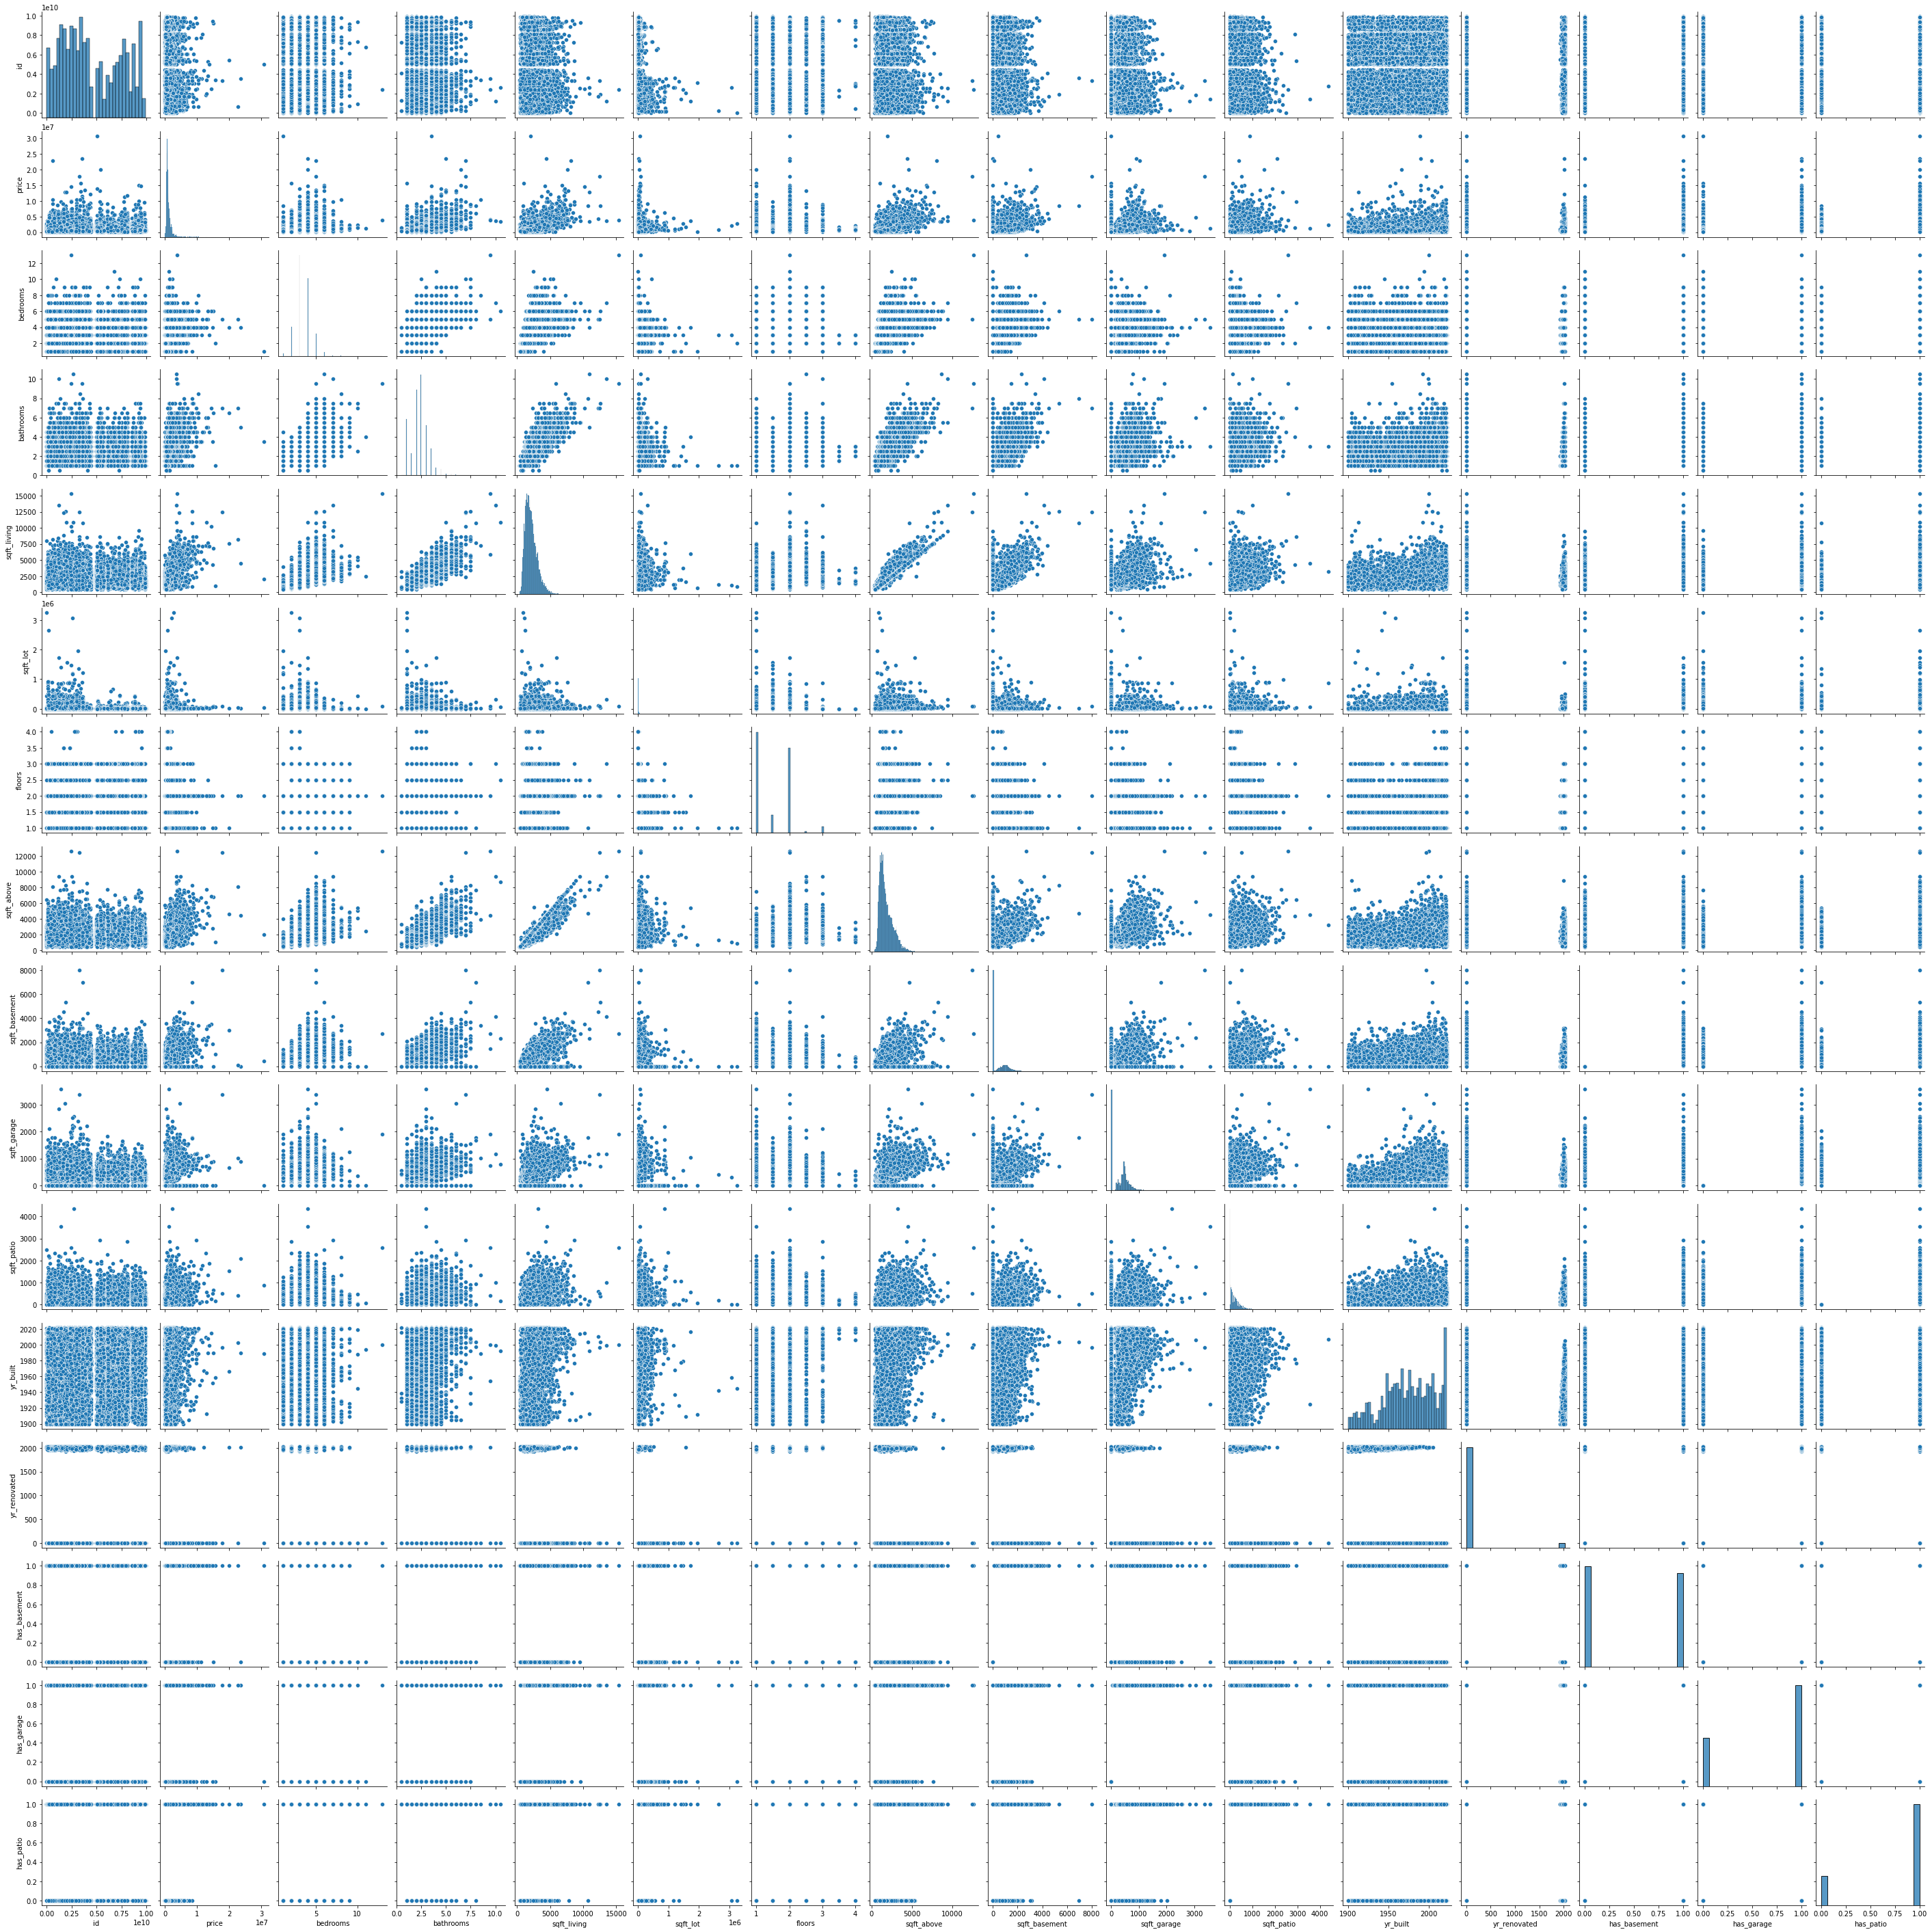

In [23]:
#sns.pairplot(data = homes_df);

In [177]:
homes_df.info()
#numeric: price, bedrooms, bathrooms, sqft_living, sqft_lot, floors,  
#sqft_above,  sqft_basement, sqft_garage  , sqft_patio, yr_built, yr_renovated   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29121 entries, 0 to 29188
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29121 non-null  int64  
 1   date           29121 non-null  object 
 2   price          29121 non-null  float64
 3   bedrooms       29121 non-null  int64  
 4   bathrooms      29121 non-null  float64
 5   sqft_living    29121 non-null  int64  
 6   sqft_lot       29121 non-null  int64  
 7   floors         29121 non-null  float64
 8   waterfront     29121 non-null  object 
 9   greenbelt      29121 non-null  object 
 10  view           29121 non-null  object 
 11  condition      29121 non-null  object 
 12  sqft_above     29121 non-null  int64  
 13  sqft_basement  29121 non-null  int64  
 14  sqft_garage    29121 non-null  int64  
 15  sqft_patio     29121 non-null  int64  
 16  yr_built       29121 non-null  int64  
 17  yr_renovated   29121 non-null  int64  
 18  zip   

In [179]:
numeric_homes = homes_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',  
'sqft_above',  'sqft_basement', 'sqft_garage'  , 'sqft_patio', 'has_patio', 'has_garage', 'has_basement', 'sell_age']]   

<AxesSubplot:>

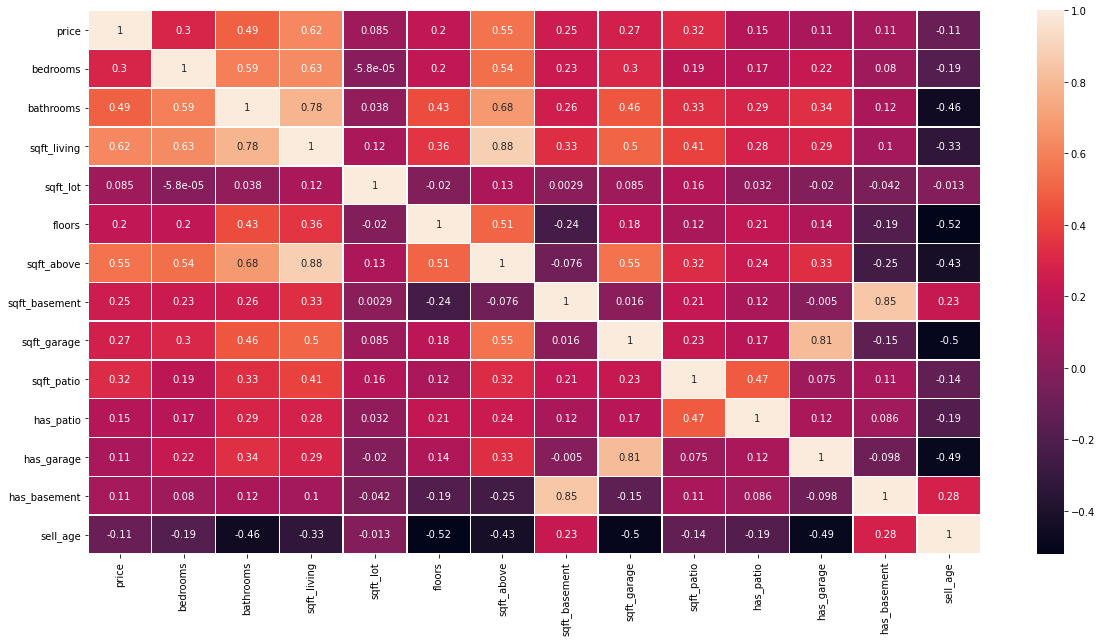

In [180]:
plt.figure(figsize = (20,10))
sns.heatmap(numeric_homes.corr(), annot = True, linewidths=.5)


In [181]:
numeric_homes.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,has_patio,has_garage,has_basement,sell_age
price,1.00000,0.29563,0.49200,0.62076,0.08453,0.20181,0.54955,0.24735,0.26928,0.31874,0.15247,0.11196,0.10715,-0.10630
bedrooms,0.29563,1.00000,0.59105,0.63218,-0.00006,0.20016,0.53914,0.23366,0.30327,0.18932,0.17068,0.22368,0.07985,-0.18552
bathrooms,0.49200,0.59105,1.00000,0.78210,0.03759,0.43307,0.68332,0.25964,0.46109,0.33217,0.28772,0.33912,0.12299,-0.45948
sqft_living,0.62076,0.63218,0.78210,1.00000,0.11895,0.35689,0.88151,0.33415,0.50373,0.40507,0.27544,0.29246,0.10139,-0.33024
sqft_lot,0.08453,-0.00006,0.03759,0.11895,1.00000,-0.02014,0.12885,0.00291,0.08457,0.16027,0.03173,-0.01973,-0.04192,-0.01308
floors,0.20181,0.20016,0.43307,0.35689,-0.02014,1.00000,0.50628,-0.24393,0.18153,0.12440,0.20573,0.14285,-0.19116,-0.52092
sqft_above,0.54955,0.53914,0.68332,0.88151,0.12885,0.50628,1.00000,-0.07601,0.55412,0.32000,0.23927,0.32994,-0.25005,-0.42926
sqft_basement,0.24735,0.23366,0.25964,0.33415,0.00291,-0.24393,-0.07601,1.00000,0.01590,0.21384,0.11714,-0.00497,0.85299,0.22721
sqft_garage,0.26928,0.30327,0.46109,0.50373,0.08457,0.18153,0.55412,0.01590,1.00000,0.22693,0.17355,0.81291,-0.14955,-0.49766
sqft_patio,0.31874,0.18932,0.33217,0.40507,0.16027,0.12440,0.32000,0.21384,0.22693,1.00000,0.47401,0.07538,0.11342,-0.13653


In [182]:
x = numeric_homes.drop(['price'], axis = 1)
y = numeric_homes['price']

In [183]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,has_patio,has_garage,has_basement,sell_age
0,4,1.00000,1180,7140,1.00000,1180,0,0,40,1,0,0,53
1,3,2.00000,1830,7969,1.00000,930,930,240,90,1,1,1,72
2,4,2.00000,2170,7520,1.00000,1240,1240,490,60,1,1,1,49
3,4,2.00000,1400,10364,1.50000,1400,0,330,330,1,1,0,51
4,3,2.00000,1520,8250,1.00000,1190,590,420,200,1,1,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29184,3,1.00000,1530,33250,1.50000,1530,110,0,360,1,0,1,117
29185,1,1.00000,480,7475,1.00000,480,0,0,0,0,0,0,113
29186,2,1.00000,1040,114998,1.00000,1040,0,0,0,0,0,0,93
29187,2,1.00000,1260,11160,1.50000,1260,0,0,110,1,0,0,103


In [184]:
model = sm.OLS(y, sm.add_constant(x)).fit()

In [185]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     1694.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:09:05   Log-Likelihood:            -4.3214e+05
No. Observations:               29121   AIC:                         8.643e+05
Df Residuals:                   29107   BIC:                         8.644e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.351e+04   2.58e+04     -3.618      0.000   -1.44e+05   -4.29e+04
bedrooms      -1.626e+05   5489.548    -29.616      0.000   -1.73e+05   -1.52e+05
bathrooms      1.493e+05   8103.950     18.428      0.000    1.33e+05    1.65e+05
sqft_living     319.5618     18.265     17.496      0.000     283.762     355.362
sqft_lot         -0.1809      0.067     -2.702      0.007      -0.312      -0.050
floors        -9794.8844   1.03e+04     -0.956      0.339   -2.99e+04    1.03e+04
sqft_above      309.7778     18.479     16.764      0.000     273.559     345.997
sqft_basement   174.3656     19.386      8.994      0.000     136.367     212.364
sqft_garage     -66.7299     29.270     -2.280      0.023    -124.101      -9.359
sqft_patio      329.9857     19.745     16.712      0.000     291.284     368.687
has_patio     -1.142e+05    1.1e+04    -10.384      0.000   -1.36e+05   -9.27e+04
has_garage    -4.055e+04   1.58e+04     -2.567      0.010   -7.15e+04   -9581.220
has_basement  -3564.3571   1.73e+04     -0.206      0.836   -3.74e+04    3.03e+04
sell_age       3614.4848    182.480     19.808      0.000    3256.815    3972.154
==============================================================================
Omnibus:                    41540.235   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51491462.729
Skew:                           7.968   Prob(JB):                         0.00
Kurtosis:                     208.384   Cond. No.                     4.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
##working to bin the year data

In [33]:
homes_df['yr_built'].value_counts().sort_index().describe()

count    123.00000
mean     236.75610
std      153.65612
min       30.00000
25%      120.50000
50%      230.00000
75%      320.50000
max     1351.00000
Name: yr_built, dtype: float64

In [34]:
homes_df['yr_built'].value_counts().sort_index()

1900     116
1901      39
1902      36
1903      56
1904      73
        ... 
2018     327
2019     259
2020     346
2021    1351
2022     289
Name: yr_built, Length: 123, dtype: int64

In [35]:
homes_df['yr_built'].value_counts()

2021    1351
1968     516
1978     493
1977     484
1967     474
        ... 
1901      39
1935      39
1934      38
1902      36
1933      30
Name: yr_built, Length: 123, dtype: int64

In [36]:
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
homes_df['year_binned'] = pd.cut(homes_df['yr_built'], bins)
homes_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,zip,has_basement,has_garage,has_patio,year_binned
0,7399300360,5/24/2022,675000.00000,4,1.00000,1180,7140,1.00000,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",98055,0,0,1,"(1960, 1970]"
1,3340401570,3/2/2022,750000.00000,3,2.00000,1830,7969,1.00000,NO,NO,...,240,90,1950,2008,"306 South 15th Street, Renton, Washington 9805...",98055,1,1,1,"(1940, 1950]"
2,7399301200,3/29/2022,728000.00000,4,2.00000,2170,7520,1.00000,NO,NO,...,490,60,1973,0,"1814 Aberdeen Avenue Southeast, Renton, Washin...",98055,1,1,1,"(1970, 1980]"
3,9899200050,3/24/2022,565000.00000,4,2.00000,1400,10364,1.50000,NO,NO,...,330,330,1971,0,"3426 Shattuck Avenue South, Renton, Washington...",98055,0,1,1,"(1970, 1980]"
4,6673070070,12/28/2021,645000.00000,3,2.00000,1520,8250,1.00000,NO,NO,...,420,200,1981,0,"2209 Southeast 21st Street, Renton, Washington...",98055,1,1,1,"(1980, 1990]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29184,278100055,9/15/2021,750000.00000,3,1.00000,1530,33250,1.50000,NO,NO,...,0,360,1904,0,"8623 308th Avenue Southeast, Issaquah, Washing...",98050,1,0,1,"(1900, 1910]"
29185,2943100120,7/14/2021,315000.00000,1,1.00000,480,7475,1.00000,NO,NO,...,0,0,1908,1970,"14602 681st Avenue Northeast, Baring, Washingt...",98224,0,0,0,"(1900, 1910]"
29186,226109016,11/30/2021,250000.00000,2,1.00000,1040,114998,1.00000,NO,NO,...,0,0,1928,0,"63928 Stevens Pass Highway, Baring, Washington...",98224,0,0,0,"(1920, 1930]"
29187,525100215,10/14/2021,202000.00000,2,1.00000,1260,11160,1.50000,NO,NO,...,0,110,1918,0,"63608 Northeast 197th Place, Baring, Washingto...",98224,0,0,1,"(1910, 1920]"


In [37]:
twenty_21_homes = homes_df.loc[homes_df['yr_built'] == 2021]

In [38]:
twenty_21_homes.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,has_basement,has_garage,has_patio
count,1351.00000,1351.00000,1351.00000,1351.00000,1351.00000,1351.00000,1351.00000,1351.00000,1351.00000,1351.00000,1351.00000,1351.00000,1351.00000,1351.00000,1351.00000,1351.00000
mean,4760529699.05848,1228182.94449,3.67506,2.97520,2575.68024,6335.72909,2.21873,2386.22206,260.63879,343.59511,257.96373,2021.00000,0.00000,0.35307,0.72243,0.96891
std,3063808793.67329,863561.52426,1.09556,0.89336,1108.18132,20552.98501,0.48657,1073.67149,427.53374,247.18757,170.23758,0.00000,0.00000,0.47810,0.44797,0.17362
min,7600049.00000,72500.00000,1.00000,1.00000,540.00000,420.00000,1.00000,460.00000,0.00000,0.00000,0.00000,2021.00000,0.00000,0.00000,0.00000,0.00000
25%,1934800108.00000,719969.00000,3.00000,2.50000,1510.00000,1339.50000,2.00000,1410.00000,0.00000,0.00000,160.00000,2021.00000,0.00000,0.00000,0.00000,1.00000
50%,4039400650.00000,876210.00000,4.00000,3.00000,2660.00000,4374.00000,2.00000,2450.00000,0.00000,410.00000,240.00000,2021.00000,0.00000,0.00000,1.00000,1.00000
75%,7938810045.00000,1471181.50000,4.00000,3.50000,3380.00000,6753.50000,2.00000,3130.00000,400.00000,480.00000,330.00000,2021.00000,0.00000,1.00000,1.00000,1.00000
max,9890000030.00000,10500000.00000,9.00000,7.00000,7230.00000,497020.00000,4.00000,6510.00000,2640.00000,1510.00000,1810.00000,2021.00000,0.00000,1.00000,1.00000,1.00000


In [39]:
twenty_21_homes.loc[homes_df['zip'] == '98010'].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,has_basement,has_garage,has_patio
count,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000
mean,8275107370.09722,812605.88194,4.06250,2.76389,2856.31944,4880.97222,2.02778,2828.40278,27.91667,447.43056,198.68056,2021.00000,0.00000,0.03472,1.00000,1.00000
std,1430706758.35275,147816.52397,0.75000,0.44621,484.75752,1694.79268,0.26297,469.75319,155.49099,80.21602,81.14777,0.00000,0.00000,0.18371,0.00000,0.00000
min,1421069071.00000,546786.00000,2.00000,2.00000,1540.00000,1005.00000,1.00000,1540.00000,0.00000,340.00000,40.00000,2021.00000,0.00000,0.00000,1.00000,1.00000
25%,8576020890.00000,707462.50000,4.00000,2.50000,2600.00000,4000.00000,2.00000,2587.50000,0.00000,400.00000,160.00000,2021.00000,0.00000,0.00000,1.00000,1.00000
50%,8576050605.00000,807475.00000,4.00000,2.50000,2820.00000,4401.00000,2.00000,2820.00000,0.00000,420.00000,190.00000,2021.00000,0.00000,0.00000,1.00000,1.00000
75%,8576070702.50000,912324.50000,5.00000,3.00000,3090.00000,5416.00000,2.00000,3090.00000,0.00000,470.00000,230.00000,2021.00000,0.00000,0.00000,1.00000,1.00000
max,8576100560.00000,1467368.00000,5.00000,4.50000,4790.00000,12819.00000,3.00000,4790.00000,1090.00000,750.00000,420.00000,2021.00000,0.00000,1.00000,1.00000,1.00000


In [60]:
numeric_homes.corr() #sqft_living has highest correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio
price,1.00000,0.29103,0.48804,0.61651,0.08593,0.19994,0.54599,0.24633,0.26791,0.31725
bedrooms,0.29103,1.00000,0.59472,0.63160,-0.00267,0.19643,0.53855,0.23538,0.30629,0.19185
bathrooms,0.48804,0.59472,1.00000,0.78034,0.03674,0.42810,0.68160,0.26082,0.46191,0.33306
sqft_living,0.61651,0.63160,0.78034,1.00000,0.11597,0.35644,0.88195,0.33587,0.50442,0.40543
sqft_lot,0.08593,-0.00267,0.03674,0.11597,1.00000,-0.02103,0.12595,0.00206,0.08279,0.15805
floors,0.19994,0.19643,0.42810,0.35644,-0.02103,1.00000,0.50605,-0.24301,0.18047,0.12377
sqft_above,0.54599,0.53855,0.68160,0.88195,0.12595,0.50605,1.00000,-0.07340,0.55440,0.32051
sqft_basement,0.24633,0.23538,0.26082,0.33587,0.00206,-0.24301,-0.07340,1.00000,0.01747,0.21452
sqft_garage,0.26791,0.30629,0.46191,0.50442,0.08279,0.18047,0.55440,0.01747,1.00000,0.22801
sqft_patio,0.31725,0.19185,0.33306,0.40543,0.15805,0.12377,0.32051,0.21452,0.22801,1.00000


In [188]:
#run a simple regression on this correlation
x = numeric_homes['sqft_living']
y = numeric_homes['price']

In [189]:
simple_model = sm.OLS(y, sm.add_constant(x)).fit()

In [190]:
sm_summary = simple_model.summary()
sm_summary #shows a low rquared at .385 but model is significant. for every 1 sqft change, price increases by 568

#note kurtosis is 205 in this which denotes a very high skew. We therefore looked into taking the log instead of the uy variable. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                 1.826e+04
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:11:29   Log-Likelihood:            -4.3326e+05
No. Observations:               29121   AIC:                         8.665e+05
Df Residuals:                   29119   BIC:                         8.665e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.933e+04   9866.861    -10.068      0.000   -1.19e+05      -8e+04
sqft_living   568.2131      4.206    135.111      0.000     559.970     576.456
==============================================================================
Omnibus:                    41926.772   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50304374.618
Skew:                           8.140   Prob(JB):                         0.00
Kurtosis:                     205.961   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
x = numeric_homes['sqft_living']
y_log = np.log(y)
log_model = sm.OLS(y_log, sm.add_constant(x)).fit()
log_model.summary()
#how to properly interprett the logged variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                 1.875e+04
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:13:56   Log-Likelihood:                -18489.
No. Observations:               29121   AIC:                         3.698e+04
Df Residuals:                   29119   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9373      0.006   2010.503      0.000      12.925      12.950
sqft_living     0.0004   2.74e-06    136.919      0.000       0.000       0.000
==============================================================================
Omnibus:                     5900.747   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44702.235
Skew:                          -0.773   Prob(JB):                         0.00
Kurtosis:                       8.870   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
x1 = numeric_homes.drop(['price', 'yr_renovated', 'yr_built'], axis = 1)
y = numeric_homes['price']
multi_model = sm.OLS(y, sm.add_constant(x1)).fit()
mm_summary = multi_model.summary()
mm_summary #this is a stronger adj R,

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     2338.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:11:20   Log-Likelihood:            -4.3242e+05
No. Observations:               29121   AIC:                         8.649e+05
Df Residuals:                   29111   BIC:                         8.650e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.017e+05   1.79e+04     11.252      0.000    1.67e+05    2.37e+05
bedrooms      -1.574e+05   5497.997    -28.634      0.000   -1.68e+05   -1.47e+05
bathrooms      1.025e+05   7864.435     13.031      0.000    8.71e+04    1.18e+05
sqft_living     284.3742     18.126     15.689      0.000     248.847     319.901
sqft_lot         -0.1315      0.067     -1.954      0.051      -0.263       0.000
floors        -9.949e+04   9348.967    -10.641      0.000   -1.18e+05   -8.12e+04
sqft_above      378.0727     18.319     20.639      0.000     342.168     413.978
sqft_basement   239.2406     13.135     18.215      0.000     213.496     264.985
sqft_garage    -297.7071     17.273    -17.235      0.000    -331.563    -263.851
sqft_patio      249.8930     18.004     13.880      0.000     214.605     285.181
==============================================================================
Omnibus:                    41257.057   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48929732.563
Skew:                           7.872   Prob(JB):                         0.00
Kurtosis:                     203.194   Cond. No.                     3.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is a higher adjusted R squared when looking at the numeric variables given in the dataset. Based on this there are a few things to note:
1. sqft of lot has a p value greater than alpha at .5 and seems insignificant, bc of this we will be removing this from the regression

In [47]:
x2 = numeric_homes.drop(['price', 'sqft_lot'], axis = 1)
y = numeric_homes['price']
multi_model2 = sm.OLS(y, sm.add_constant(x2)).fit()
mm2_summary = multi_model2.summary()
mm2_summary 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     2630.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:14:10   Log-Likelihood:            -4.3243e+05
No. Observations:               29121   AIC:                         8.649e+05
Df Residuals:                   29112   BIC:                         8.649e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.978e+05   1.78e+04     11.103      0.000    1.63e+05    2.33e+05
bedrooms      -1.566e+05   5483.408    -28.566      0.000   -1.67e+05   -1.46e+05
bathrooms      1.032e+05   7855.902     13.138      0.000    8.78e+04    1.19e+05
sqft_living     283.7291     18.123     15.655      0.000     248.206     319.252
floors        -9.797e+04   9317.306    -10.515      0.000   -1.16e+05   -7.97e+04
sqft_above      376.5109     18.302     20.572      0.000     340.638     412.384
sqft_basement   239.5270     13.134     18.237      0.000     213.783     265.271
sqft_garage    -297.8449     17.274    -17.243      0.000    -331.702    -263.987
sqft_patio      245.5195     17.865     13.743      0.000     210.503     280.536
==============================================================================
Omnibus:                    41254.876   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48943291.545
Skew:                           7.871   Prob(JB):                         0.00
Kurtosis:                     203.222   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
x3 = numeric_homes.drop(['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'], axis = 1)
y = numeric_homes['price']
multi_model3 = sm.OLS(y, sm.add_constant(x3)).fit()
mm3_summary = multi_model3.summary()
mm3_summary 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     4846.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:39:07   Log-Likelihood:            -4.3403e+05
No. Observations:               29189   AIC:                         8.681e+05
Df Residuals:                   29184   BIC:                         8.681e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.624e+05   1.74e+04     15.040      0.000    2.28e+05    2.97e+05
bedrooms    -1.641e+05   5505.598    -29.815      0.000   -1.75e+05   -1.53e+05
bathrooms    8.075e+04   7707.379     10.477      0.000    6.56e+04    9.59e+04
sqft_living   624.8679      7.070     88.387      0.000     611.011     638.725
floors      -6.939e+04   8250.497     -8.410      0.000   -8.56e+04   -5.32e+04
==============================================================================
Omnibus:                    41829.313   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48981205.219
Skew:                           8.070   Prob(JB):                         0.00
Kurtosis:                     203.033   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

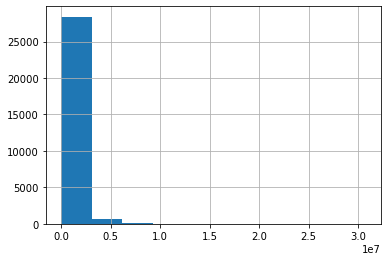

In [65]:
y.hist()

In [82]:
y_log = np.log(y)
log_model = sm.OLS(y_log, sm.add_constant(x)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 1.865e+04
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:11:02   Log-Likelihood:                -18610.
No. Observations:               29189   AIC:                         3.722e+04
Df Residuals:                   29187   BIC:                         3.724e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9404      0.006   2013.542      0.000      12.928      12.953
sqft_living     0.0004   2.74e-06    136.559      0.000       0.000       0.000
==============================================================================
Omnibus:                     5805.149   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45206.693
Skew:                          -0.746   Prob(JB):                         0.00
Kurtosis:                       8.911   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

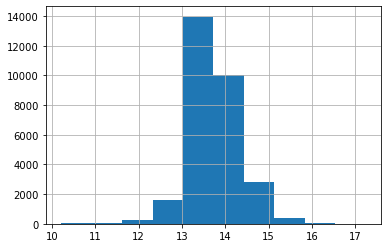

In [68]:
y_log.hist()

In [71]:
x = numeric_homes['sqft_living']
multi_model = sm.OLS(y_log, sm.add_constant(x)).fit()
mm_summary = multi_model.summary()
mm_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 1.865e+04
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:56:42   Log-Likelihood:                -18610.
No. Observations:               29189   AIC:                         3.722e+04
Df Residuals:                   29187   BIC:                         3.724e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9404      0.006   2013.542      0.000      12.928      12.953
sqft_living     0.0004   2.74e-06    136.559      0.000       0.000       0.000
==============================================================================
Omnibus:                     5805.149   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45206.693
Skew:                          -0.746   Prob(JB):                         0.00
Kurtosis:                       8.911   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:

x = numeric_homes.drop(['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'], axis = 1)
ss = StandardScaler().fit(x)

X_scaled = ss.transform(x)
X_c = sm.add_constant(X_scaled)
scale_model = sm.OLS(endog=y_log, exog=X_c).fit()
scale_model.summary()
##this does nothing except lower covariance


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     4834.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:03:12   Log-Likelihood:                -18401.
No. Observations:               29189   AIC:                         3.681e+04
Df Residuals:                   29184   BIC:                         3.685e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7381      0.003   5163.520      0.000      13.733      13.743
x1            -0.0566      0.004    -16.043      0.000      -0.064      -0.050
x2             0.0605      0.005     13.382      0.000       0.052       0.069
x3             0.3507      0.005     77.535      0.000       0.342       0.360
x4             0.0104      0.003      3.511      0.000       0.005       0.016
==============================================================================
Omnibus:                     5824.489   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45959.816
Skew:                          -0.746   Prob(JB):                         0.00
Kurtosis:                       8.964   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
homes_df[['yr_built', 'date' ]]

,yr_built,date
0,1969,5/24/2022
1,1950,3/2/2022
2,1973,3/29/2022
3,1971,3/24/2022
4,1981,12/28/2021
...,...,...
29184,1904,9/15/2021
29185,1908,7/14/2021
29186,1928,11/30/2021
29187,1918,10/14/2021


In [109]:
homes_df['date'].map(lambda x: x.split('/')[-4:])

0         [5, 24, 2022]
1          [3, 2, 2022]
2         [3, 29, 2022]
3         [3, 24, 2022]
4        [12, 28, 2021]
              ...      
29184     [9, 15, 2021]
29185     [7, 14, 2021]
29186    [11, 30, 2021]
29187    [10, 14, 2021]
29188      [8, 5, 2021]
Name: date, Length: 29189, dtype: object

In [113]:
homes_df['sell_year'] = homes_df['date'].map(lambda x: x.split('/')[-1][-4:])

In [116]:
homes_df['sell_year'].astype(int)

0        2022
1        2022
2        2022
3        2022
4        2021
         ... 
29184    2021
29185    2021
29186    2021
29187    2021
29188    2021
Name: sell_year, Length: 29189, dtype: int64

In [119]:
homes_df['yr_built'].astype(int)

0        1969
1        1950
2        1973
3        1971
4        1981
         ... 
29184    1904
29185    1908
29186    1928
29187    1918
29188    1972
Name: yr_built, Length: 29189, dtype: int64

In [125]:
homes_df['sell_age'] = homes_df['sell_year'].astype(int) - homes_df['yr_built'].astype(int)

In [132]:
homes_df.drop('sell_sge', axis = 1, inplace = True)

In [133]:
homes_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,zip,has_basement,has_garage,has_patio,sell_year,sell_age
0,7399300360,5/24/2022,675000.00000,4,1.00000,1180,7140,1.00000,NO,NO,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",98055,0,0,1,2022,53
1,3340401570,3/2/2022,750000.00000,3,2.00000,1830,7969,1.00000,NO,NO,...,90,1950,2008,"306 South 15th Street, Renton, Washington 9805...",98055,1,1,1,2022,72
2,7399301200,3/29/2022,728000.00000,4,2.00000,2170,7520,1.00000,NO,NO,...,60,1973,0,"1814 Aberdeen Avenue Southeast, Renton, Washin...",98055,1,1,1,2022,49
3,9899200050,3/24/2022,565000.00000,4,2.00000,1400,10364,1.50000,NO,NO,...,330,1971,0,"3426 Shattuck Avenue South, Renton, Washington...",98055,0,1,1,2022,51
4,6673070070,12/28/2021,645000.00000,3,2.00000,1520,8250,1.00000,NO,NO,...,200,1981,0,"2209 Southeast 21st Street, Renton, Washington...",98055,1,1,1,2021,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29184,278100055,9/15/2021,750000.00000,3,1.00000,1530,33250,1.50000,NO,NO,...,360,1904,0,"8623 308th Avenue Southeast, Issaquah, Washing...",98050,1,0,1,2021,117
29185,2943100120,7/14/2021,315000.00000,1,1.00000,480,7475,1.00000,NO,NO,...,0,1908,1970,"14602 681st Avenue Northeast, Baring, Washingt...",98224,0,0,0,2021,113
29186,226109016,11/30/2021,250000.00000,2,1.00000,1040,114998,1.00000,NO,NO,...,0,1928,0,"63928 Stevens Pass Highway, Baring, Washington...",98224,0,0,0,2021,93
29187,525100215,10/14/2021,202000.00000,2,1.00000,1260,11160,1.50000,NO,NO,...,110,1918,0,"63608 Northeast 197th Place, Baring, Washingto...",98224,0,0,1,2021,103


In [135]:
homes_df.info() #create boolean for renovated

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29189 entries, 0 to 29188
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29189 non-null  int64  
 1   date           29189 non-null  object 
 2   price          29189 non-null  float64
 3   bedrooms       29189 non-null  int64  
 4   bathrooms      29189 non-null  float64
 5   sqft_living    29189 non-null  int64  
 6   sqft_lot       29189 non-null  int64  
 7   floors         29189 non-null  float64
 8   waterfront     29189 non-null  object 
 9   greenbelt      29189 non-null  object 
 10  nuisance       29189 non-null  object 
 11  view           29189 non-null  object 
 12  condition      29189 non-null  object 
 13  grade          29189 non-null  object 
 14  heat_source    29160 non-null  object 
 15  sewer_system   29176 non-null  object 
 16  sqft_above     29189 non-null  int64  
 17  sqft_basement  29189 non-null  int64  
 18  sqft_g

In [137]:
numeric_homes2 = homes_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',  
'sqft_above',  'sqft_basement', 'sqft_garage'  , 'sqft_patio', 'sell_year', 'sell_age']]   

In [138]:
numeric_homes2.corr() #sell age negatively correlated which makes sense. 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,sell_age
price,1.00000,0.29103,0.48804,0.61651,0.08593,0.19994,0.54599,0.24633,0.26791,0.31725,-0.10537
bedrooms,0.29103,1.00000,0.59472,0.63160,-0.00267,0.19643,0.53855,0.23538,0.30629,0.19185,-0.18406
bathrooms,0.48804,0.59472,1.00000,0.78034,0.03674,0.42810,0.68160,0.26082,0.46191,0.33306,-0.45668
sqft_living,0.61651,0.63160,0.78034,1.00000,0.11597,0.35644,0.88195,0.33587,0.50442,0.40543,-0.32975
sqft_lot,0.08593,-0.00267,0.03674,0.11597,1.00000,-0.02103,0.12595,0.00206,0.08279,0.15805,-0.01255
floors,0.19994,0.19643,0.42810,0.35644,-0.02103,1.00000,0.50605,-0.24301,0.18047,0.12377,-0.52137
sqft_above,0.54599,0.53855,0.68160,0.88195,0.12595,0.50605,1.00000,-0.07340,0.55440,0.32051,-0.42903
sqft_basement,0.24633,0.23538,0.26082,0.33587,0.00206,-0.24301,-0.07340,1.00000,0.01747,0.21452,0.22658
sqft_garage,0.26791,0.30629,0.46191,0.50442,0.08279,0.18047,0.55440,0.01747,1.00000,0.22801,-0.49694
sqft_patio,0.31725,0.19185,0.33306,0.40543,0.15805,0.12377,0.32051,0.21452,0.22801,1.00000,-0.13655


In [146]:
homes_df['renovated'] = homes_df['yr_renovated'].map(has_feature)

In [186]:
homes_df.corr().price.sort_values() #checking correlations 

sell_age        -0.10630
id              -0.02956
sqft_lot         0.08453
yr_renovated     0.08602
has_basement     0.10715
yr_built         0.10741
has_garage       0.11196
has_patio        0.15247
floors           0.20181
sqft_basement    0.24735
sqft_garage      0.26928
bedrooms         0.29563
sqft_patio       0.31874
bathrooms        0.49200
sqft_above       0.54955
sqft_living      0.62076
price            1.00000
Name: price, dtype: float64

In [164]:
numeric_homes2.drop("sell_year", axis = 1, inplace = True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [187]:
x = numeric_homes.drop('price', axis = 1)
y_log = np.log(y)
log_model = sm.OLS(y_log, sm.add_constant(x)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1662.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:10:45   Log-Likelihood:                -17644.
No. Observations:               29121   AIC:                         3.532e+04
Df Residuals:                   29107   BIC:                         3.543e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.6400      0.017    743.006      0.000      12.607      12.673
bedrooms         -0.0578      0.004    -15.996      0.000      -0.065      -0.051
bathrooms         0.0952      0.005     17.844      0.000       0.085       0.106
sqft_living       0.0002    1.2e-05     19.545      0.000       0.000       0.000
sqft_lot       4.212e-08   4.41e-08      0.955      0.339   -4.43e-08    1.29e-07
floors            0.0682      0.007     10.111      0.000       0.055       0.081
sqft_above        0.0001   1.22e-05     10.732      0.000       0.000       0.000
sqft_basement   -8.7e-06   1.28e-05     -0.682      0.495   -3.37e-05    1.63e-05
sqft_garage   -2.141e-05   1.93e-05     -1.111      0.267   -5.92e-05    1.64e-05
sqft_patio        0.0002    1.3e-05     11.733      0.000       0.000       0.000
has_patio        -0.0078      0.007     -1.081      0.280      -0.022       0.006
has_garage        0.0293      0.010      2.813      0.005       0.009       0.050
has_basement      0.1317      0.011     11.588      0.000       0.109       0.154
sell_age          0.0028      0.000     23.144      0.000       0.003       0.003
==============================================================================
Omnibus:                     6904.014   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59700.128
Skew:                          -0.898   Prob(JB):                         0.00
Kurtosis:                       9.781   Cond. No.                     4.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#look into non renovated age homes specific data subset i.e where renovated = 0 

In [ ]:
#booleans -- use the boolean columns instead of sqft columns in regression and check it out. 